# Pima Indians Diabetes Dataset
##### This dataset originates from a longitudinal study conducted by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). It comprises data on 768 female patients of Pima Indian heritage (age ≥ 21) living near Phoenix, Arizona. The goal was to identify clinical predictors of type-2 diabetes risk in a high-prevalence population.
##### Study details: https://www.astro.uvic.ca/~karun/UVic_ACML/Smith1988.pdf

### Columns & Definitions:
##### Pregnancies: Number of times pregnant
##### Glucose: Plasma glucose concentration 2hr after 75g load (mg/dL; zeros indicate missing)
##### BloodPressure: Diastolic BP (mm Hg; zeros indicate missing)
##### SkinThickness: Triceps skin-fold thickness (mm; zeros indicate missing)
##### Insulin: 2-hr serum insulin (µU/mL; zeros indicate missing)
##### BMI: Body mass index (kg/m²; zeros indicate missing)
##### DiabetesPedigreeFunction: Genetic risk score (unitless)
##### Age: Patient age (years)
##### Outcome: Diabetes diagnosis (1 = diabetic, 0 = non-diabetic)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading csv into pandas dataframe
df = pd.read_csv('diabetes.csv')

# Getting quick look at dataframe and dimensions
display(df.head())
print("Shape:", df.shape)
display(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [22]:
# Checking key summary metrics of dataset
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observations and Conclusion

#### From the output of fd.describe(), several physiological variables (Glucose, Blood Pressure, Skin Thickness, Insulin, BMI) have a **minimum value of 0**. Clinically, it's impossible for someone to have zero glucose concentration, same goes for all other columns listed above. Therefore, these zeros clearly represent **missing measurements** rather than true values.

#### We will treat these zeros as "missing" (NaN) in our Trial B and C imputations and drop them entirely in Trial A, before proceeding with any modeling.

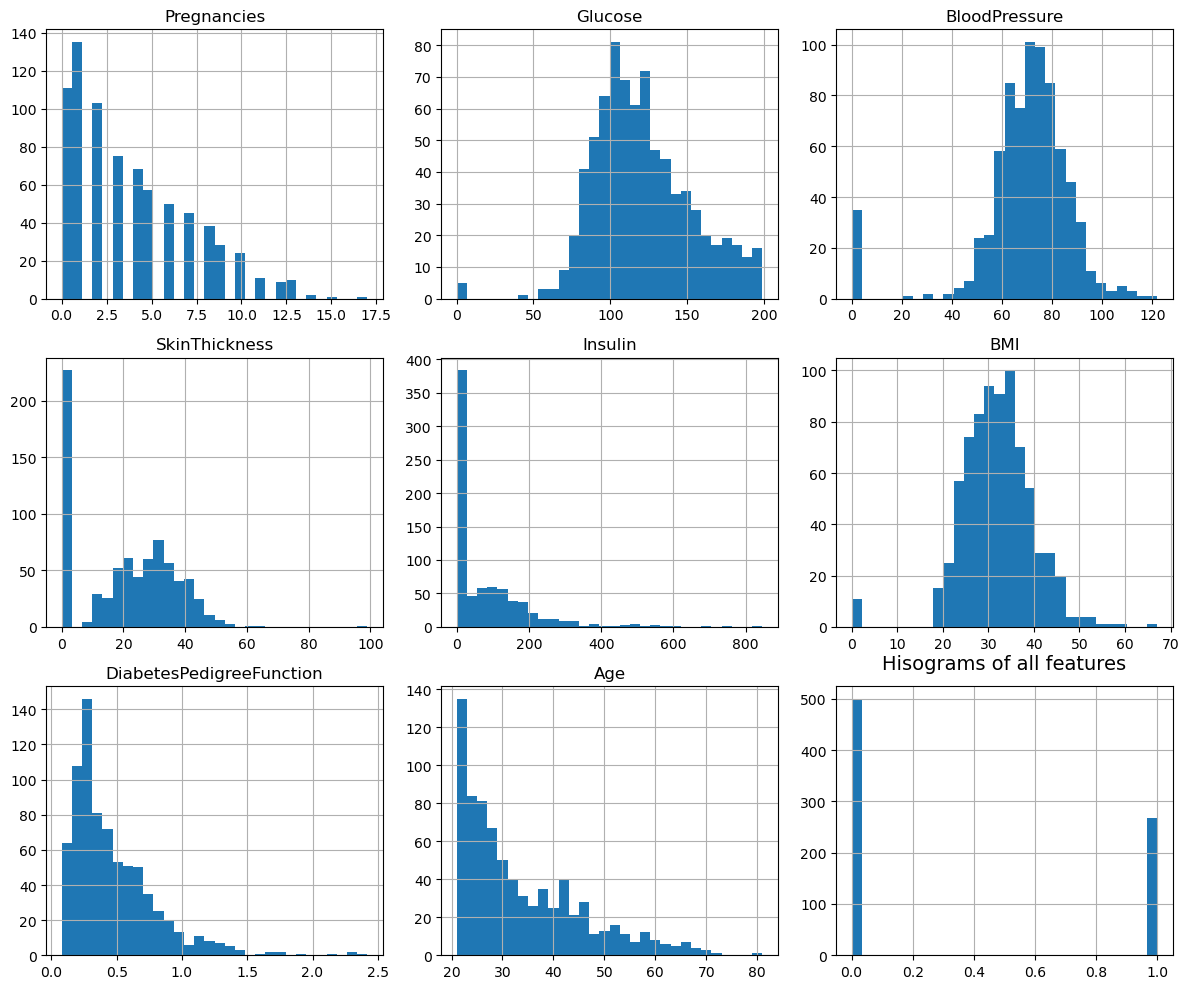

In [17]:
# Displaying Feature distributions using histogram over every column in dataset
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

### Feature Distributions

The histograms reveal several important data characteristics:

- **Glucose, BloodPressure, BMI, Insulin, SkinThickness** all show spikes at **0**, confirming these zeros encode missing measurements.
- After removing the zeros, these physiological variables (especially **Glucose** and **BMI**) exhibit right-skewed distributions with long upper tails, suggesting the need for imputation and/or transformations (e.g. log scale) before modeling.
- **Pregnancies** and **Age** are discrete counts with a clear skew toward lower values (most women had fewer than 5 pregnancies; most are under 50 years old).
- **DiabetesPedigreeFunction** is heavily concentrated below 1.0 but also right-skewed, reflecting a small number of patients with high genetic risk scores.
- **Outcome** is a balanced binary distribution (around 65% non-diabetic, 35% diabetic) with no ambiguity.

Overall, these plots underscore the prevalence of missing-value encodings at zero and highlight which variables may benefit from normalization or specialized treatment in downstream models.  

In [20]:
# Identify missing-values (zeros)
missing_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
zero_counts = (df[missing_cols] == 0).sum()
zero_perc = (df[missing_cols] == 0).mean() * 100
print("Zero counts per column out of 796:")
print(zero_counts.to_string())

Zero counts per column out of 796:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
